<a href="https://colab.research.google.com/github/ghazaletlbn/my-bachelor-project/blob/main/Bachelor_project_part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import random
import scipy.sparse as sp
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.sparse.linalg import eigsh
from scipy.stats import pareto, expon, uniform, weibull_min
import math

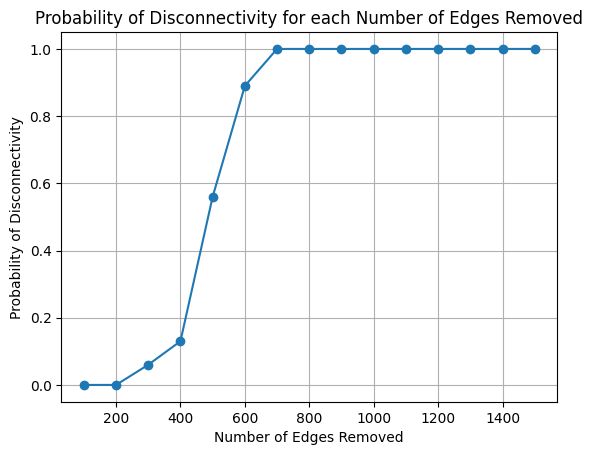

Algebraic Connectivity: 2.399851608409091e-15
Nodal Connectivity: 6
Edge Connectivity: 6


In [ ]:
def generate_regular_graph(num_nodes, degree):
    G = nx.random_regular_graph(degree, num_nodes)
    return G

def remove_edges_randomly(G, num_edges_remove):
    G_copy = G.copy()

    edges = list(G_copy.edges())
    random.shuffle(edges)

    for edge in edges:
        if num_edges_remove <= 0:
            break

        G_copy.remove_edge(*edge)
        num_edges_remove -= 1

    return G_copy

def calculate_disconnectivity_probability(num_nodes, degree, num_edges_range, num_simulations):
    probability_disconnect = []

    for num_edges_remove in num_edges_range:
        disconnected_count = 0

        for _ in range(num_simulations):
            G = generate_regular_graph(num_nodes, degree)
            G_removed = remove_edges_randomly(G, num_edges_remove)

            if not nx.is_connected(G_removed):
                disconnected_count += 1

        probability = disconnected_count / num_simulations
        probability_disconnect.append(probability)

    return probability_disconnect

def estimate_algebraic_connectivity(G):
    # Convert the graph to a Laplacian matrix
    L = nx.laplacian_matrix(G).astype(float)

    # Compute the algebraic connectivity using eigsh
    eigenvalues = eigsh(L, k=2, which='SM', return_eigenvectors=False)

    algebraic_connectivity = eigenvalues[1]

    return algebraic_connectivity


# Example usage
num_nodes = 500
degree = 6
num_edges_range = range(100, 1600, 100)
num_simulations = 100

probability_disconnect = calculate_disconnectivity_probability(num_nodes, degree, num_edges_range, num_simulations)

# Plotting the probabilities
plt.plot(num_edges_range, probability_disconnect, marker='o')
plt.xlabel('Number of Edges Removed')
plt.ylabel('Probability of Disconnectivity')
plt.title('Probability of Disconnectivity for each Number of Edges Removed')
plt.grid(True)
plt.show()

G = generate_regular_graph(num_nodes, degree)
algebraic_connectivity = estimate_algebraic_connectivity(G)
nodal_connectivity = nx.node_connectivity(G)
edge_connectivity = nx.edge_connectivity(G)

print("Algebraic Connectivity:", algebraic_connectivity)
print("Nodal Connectivity:", nodal_connectivity)
print("Edge Connectivity:", edge_connectivity)

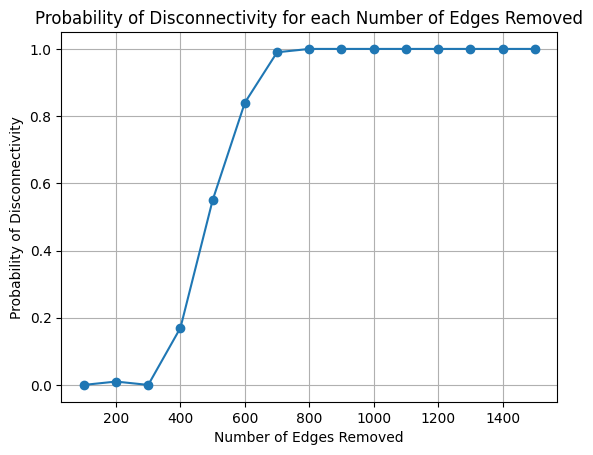

Algebraic Connectivity: -3.990865305715004e-16
Nodal Connectivity: 6
Edge Connectivity: 6


In [ ]:
def generate_regular_graph(num_nodes, degree):
    G = nx.random_regular_graph(degree, num_nodes)
    return G

def remove_edges_randomly(G, num_edges_remove):
    G_copy = G.copy()

    edges = list(G_copy.edges())
    random.shuffle(edges)

    for edge in edges:
        if num_edges_remove <= 0:
            break

        G_copy.remove_edge(*edge)
        num_edges_remove -= 1

    return G_copy

def calculate_disconnectivity_probability(num_nodes, degree, num_edges_range, num_simulations):
    probability_disconnect = []

    for num_edges_remove in num_edges_range:
        disconnected_count = 0

        for _ in range(num_simulations):
            G = generate_regular_graph(num_nodes, degree)
            G_removed = remove_edges_randomly(G, num_edges_remove)

            if not nx.is_connected(G_removed):
                disconnected_count += 1

        probability = disconnected_count / num_simulations
        probability_disconnect.append(probability)

    return probability_disconnect

def estimate_algebraic_connectivity(G):
    # Convert the graph to a Laplacian matrix
    L = nx.laplacian_matrix(G).astype(float)

    # Compute the algebraic connectivity using eigsh
    eigenvalues = eigsh(L, k=2, which='SM', return_eigenvectors=False)

    algebraic_connectivity = eigenvalues[1]

    return algebraic_connectivity


# Example usage
num_nodes = 500
degree = 6
num_edges_range = range(100, 1600, 100)
num_simulations = 100

probability_disconnect = calculate_disconnectivity_probability(num_nodes, degree, num_edges_range, num_simulations)

# Plotting the probabilities
plt.plot(num_edges_range, probability_disconnect, marker='o')
plt.xlabel('Number of Edges Removed')
plt.ylabel('Probability of Disconnectivity')
plt.title('Probability of Disconnectivity for each Number of Edges Removed')
plt.grid(True)
plt.show()

G = generate_regular_graph(num_nodes, degree)
algebraic_connectivity = estimate_algebraic_connectivity(G)
nodal_connectivity = nx.node_connectivity(G)
edge_connectivity = nx.edge_connectivity(G)

print("Algebraic Connectivity:", algebraic_connectivity)
print("Nodal Connectivity:", nodal_connectivity)
print("Edge Connectivity:", edge_connectivity)